In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Overview

## Matplotlib’s Split Personality
Matplotlib is unusual in that it offers two different interfaces to plotting.

One is a simple MATLAB-style API (Application Programming Interface) that was written to help MATLAB refugees find a ready home.

The other is a more “Pythonic” object-oriented API.

For reasons described below, we recommend that you use the second API.

# The APIs

In [20]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

## The MATLAB-style API

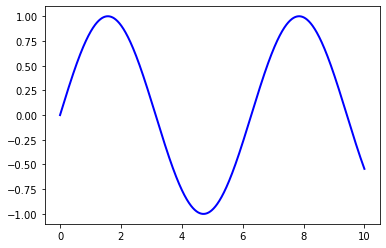

In [7]:
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

## The Object-Oriented API

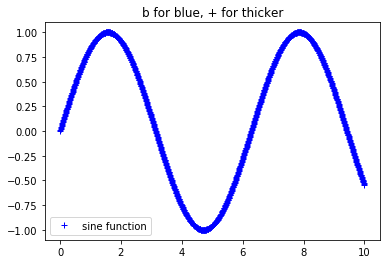

In [41]:
fig, ax = plt.subplots()
# fig is a Figure instance: a "blank canvas"
# ax is a AxesSubplot instance a frame for plotting in

ax.plot(x, y, 'b+', linewidth=2, label = 'sine function')
ax.legend()
ax.set_title('b for blue, + for thicker')
plt.show()

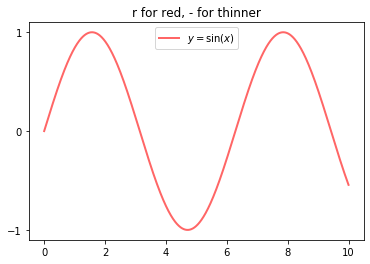

In [44]:
fig, ax = plt.subplots()

# alpha adds transparency (the lowest, the smoother)
# the text between $ signs is interpreted as LaTeX
# we can 'control' our y-axis by setting its tick rate with ax.set_yticks
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha = 0.6)
ax.legend(loc = 'upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('r for red, - for thinner')
plt.show()

# More Features

## Multiples Plots in One Axis

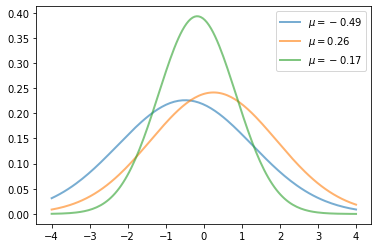

In [51]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

## Multiple Subplots

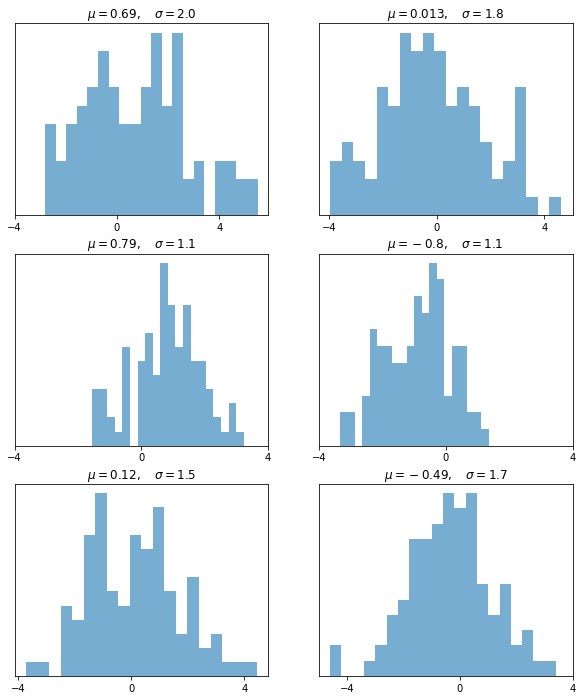

In [52]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

## 3D Plots

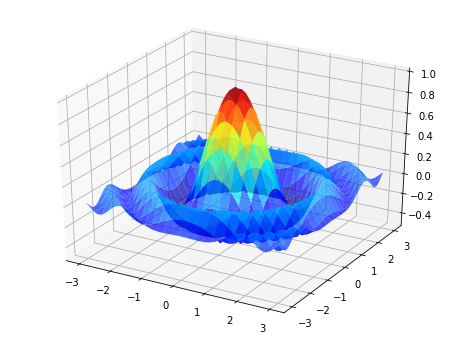

In [53]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

## A Customizing Function

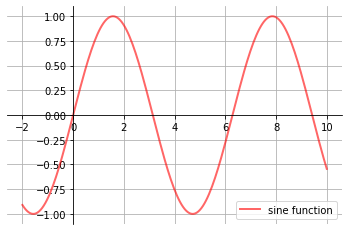

In [54]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()